# Project Machine Learning: Group 25
### Peter Bonnarens, Lennert Franssens & Philip Kukoba

# Sprint 1 : Tabular Data

### Possible tasks:
* Thorough exploratory data analysis, e.g.:
    * Are there substantial price differences between neighbourhoods ?
    * Are there hosts with more than one listing ? How does this impact the price ?
    * What is the correlation between the review score and the price ?
    * ...

    Not enough to just show a plot! Clearly describe WHAT question you investigated, WHY you think this is a relevant question
    and WHAT you deduce/conclude from the results of your data analysis

* Are there outliers ?
* A new Airbnb owner needs to pick an appropriate price:
    * Train a model to predict the price based on a selection of features
    * Find the most similar listings
    
* ...

# Table of work (who did what)

| X | Task 1 | Task 2 | Task 3 |
| --- | --- | --- | --- |
| Peter Bonnarens | | X | X |
| Lennert Franssens | X | | X |
| Philip Kukoba | X | X | |

# Reading the dataset

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 20,16

%matplotlib inline

In [37]:
listings = pd.read_csv("data/listings.csv")

# find lines to shift and add them to a mask - we've found that some lines are shifted 1 to the right beginning on the host_id column (that now contains garbage data)
shifted_lines = listings[pd.to_numeric(listings["host_verifications"], errors='coerce').notnull()].id
mask = listings['id'].isin(shifted_lines)

# shift lines 1 to the left
listings.loc[mask, 'host_id':'reviews_per_month'] = listings.loc[mask, 'host_id':'reviews_per_month'].shift(-1, axis=1)

# filter columns
listings = listings[["id", "name", "host_id", "host_response_time", "host_response_rate", "host_acceptance_rate", "host_total_listings_count", "host_verifications", "host_has_profile_pic","host_identity_verified", "neighbourhood_cleansed", "room_type", "accommodates", "price", "minimum_nights", "minimum_nights", "maximum_nights", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "number_of_reviews", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]]

# host_is_superhost t->1 en f->0
# convert price to float

listings.head()


,id,name,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
841,49136989,Boatie's * Bed bad boot,https://a0.muscache.com/pictures/miso/Hosting-...,Aye!\n,within an hour,100%,0,0,"['email', 'phone', 'manual_online', 'reviews',...",t,...,1125.0,2.0,2021-07-16,2021-05-16,5.0,5.0,5.0,5.0,5.0,5.0


### MERK OP: er zijn een paar rijen verschoven (bepaalde kolom die weg is ofzo): shift deze rijen!!!

1. host_response_time en host_response_rate: regex om tijdsinterval te kennen, slechte waarden van host_response_time vervangen door juiste waarde in host_response_rate (zie print(listings[ (~listings["host_response_rate"].isnull()) & (~listings["host_response_rate"].str.match('.*%', na=False)) ]) ) en percentage teken bij host_response_rate wegdoen
2. host acceptance rate: % wegdoen en omzetten naar float.
3. host total listings count: omzetten naar float
4. host verifications: omzetten naar lengte van de array om te kijken op hoeveel manieren een host kan geverifieerd worden (meer trustworthy?)
5. host has profile pic: omzetten naar 0 of 1 (misschien meer geboekt als wel profile pic?)
6. host identity verified: omzetten naar 0 of 1 (miscchien meer geboekt als verified?)
7.

<AxesSubplot:>

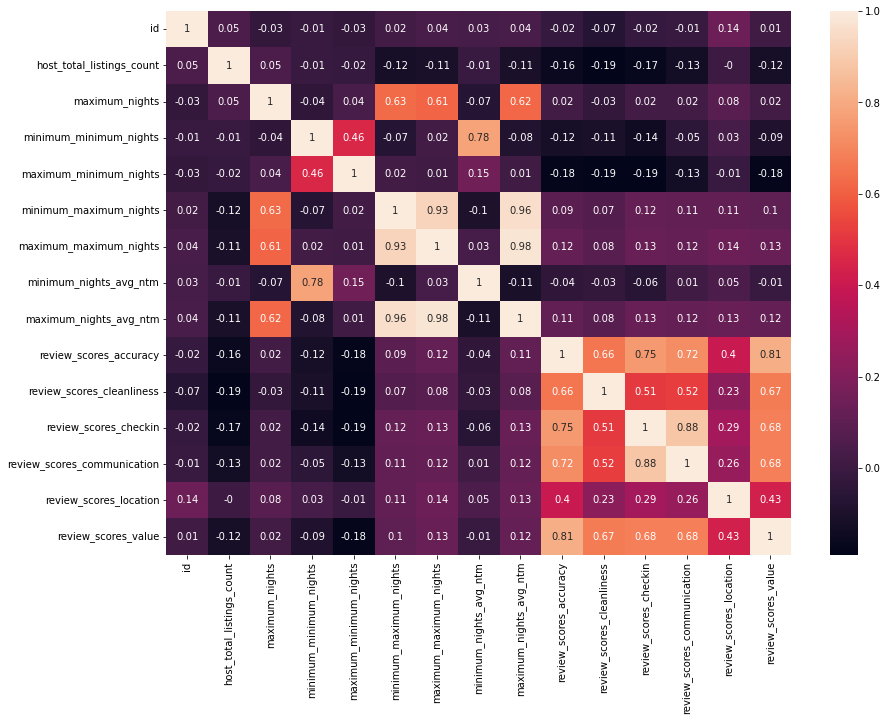

In [3]:
correlation_matrix = listings.corr().round(2)
plt.figure(figsize=(14,10))
sns.heatmap(data=correlation_matrix, annot=True)